# Introduction

We focus here on pure simulations. We target Monte Carlo simulations in this notebook to understand basic statistics and give you ways to improve yourself after SOS 2021...

In this session we plan to cover the following topics:
* Accessing common probability distributions
* Drawing random samples (predefined or custom)
* Plotting distributions (scatter plots, histograms, errorbars)
* Fitting (chi square $\chi^2$ and Maximum likelihood estimators)
* Understanding covariance (correlation, partial correlation)

We won't have time to cover confidence intervals (p-value, significance, testing) in this session.

We will thus be in line with the first series of lectures provided by J. Donini on Monday.

In this practice session we target multi-levels attendees: we cover basic ideas of statistics but also provide higher level features for already experienced participants so that every one can come back with something in the backpack...

# The practice environement - Colaboratory
**Colaboratory** = python notebooks (Jupyter) on Google servers. Convenient to share, teach, provide demonstrations... Only suited for small projects or small code. Otherwise use development environment on your computer (Atom, Pycharm, Spyder, Sublime Text,...). You can still develop large python classes and scripts (`.py` files) upload them on Google Drive and call them in your notebooks...

Main **purpose** of Colaboratory is thus: **work together and share**.
Advantages:
* Write and execute python code in your web browser (even on smartphones, tablets,...)
* Create/upload and share notebooks
* Import and save notebooks from/to Google Drive or GitHub
* Plus a lot of extras: import export datas (pandas, tensorflow, keras, use provided GPU or TPU by Google) etc..

**A python notebook** is a file (usually ".ipynb") with both `TEXT` and `CODE`, splitted in separate cells which forms the notebook. `TEXT` cells help describe the frame and the computations for demonstration purposes. `CODE` cells are executable and can share variables in the notebook workspace environement (kernel) and produce outputs (printing, tables, graphics). That's all to start with.


# Basic packages to work with

In this notebook we will use widespread packages:
- For numerical computations: `numpy`
- From `scipy` ([SciPy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)):
  - For probabilities: `scipy.stats`
  - Optimizations (finding minimum...): `scipy.optimize`
- For symbolic computations: `sympy`
- For plotting: `matplotlib`

That's all, to start with.

We start importing packages and with a few cosmetic definitions for layout, graphs, display.


In [19]:
try:
    # just in case for better display on a Retina screen on MacOSX
    # %config InlineBackend.figure_format = {'retina'} # 'svg'
    from IPython.display import set_matplotlib_formats  
    set_matplotlib_formats('pdf', 'svg')
    %config InlineBackend.figure_format ='svg'
except:
    pass

import numpy as np
import random
random.seed(1234)
np.random.seed(1234)

from scipy import stats

import sympy as sym
from IPython.display import Math
# Latex printing of equations - useful with symbolic package sympy for instance.
def laprint(x):
  return display(Math(sp.latex(x)))

import matplotlib as mpl # [m]athematics [p]lotting [l]ibrary
# mpl.rcParams["mathtext.default"] ='rm'
mpl.rcParams['mathtext.default'] = 'regular'
from matplotlib import pyplot as plt
plt.style.use('ggplot')


**A word about colors and style in plots**

Here is a nice default color palette to use in your graphics with `matplotlib`.

To use one of these colors use for instance `color='tab:red'` in your graphic call.

In [21]:
import matplotlib.colors as colors
colors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2020/master/tableau_named_colors.png" width="800px">
<figcaption><b>Fig. 1</b> | Name of some nice basic colors in matplotlib using the Tableau palette.</figcaption>.

---


# Statistical inference

<img src="https://drive.google.com/uc?id=1mcZAGx71ngbeJ4wXZNbI97XdS4DtvTW5" width = 800px>

# Probabilities

* During the statistics lectures of J. Donini, you have seen a couple of **distributions**.

* **Probabilities** are used to model the **random errors** from the measurements in Physics experiment.  
Two basic nature of errors: **continuous** and **discrete**.

Distribution probabilities in `scipy.stats`. 
For each probability distribution, you can access  to *METHODS*:
> * Random variates: `rvs(loc=0, scale=1, size=1, random_state=None)`  
> * Probability density function (PDF): `pdf(x, loc=0, scale=1)`  
> * Cumulative distribution function (CDF): `cdf(x, loc=0, scale=1)`  
> * Quantile function (functional inverse of the CDF. Percent point function): ` ppf(q, loc=0, scale=1)`  
> * Median, mean, variance, standard deviation: `median`, `mean`, `var`, `std`  

To get help, you can write this in the notebook:


In [ ]:
stats.norm?


and hit '**Shift**'+'**Return**' after the `?` on your **keyboard** or execute the cell with the **play button icon** on the left of the cell code.




## Tabulated distributions - howtos

*Objectives:*
* Plotting probability density or mass functions of standard distributions
* Drawing random variables from a given distribution

First, you want to know the available distributions?

In [ ]:
# Hit TAB key in the following line after the dot of stats. You should see a
# popup scrolling window 
stats.

<module 'scipy.stats.distributions' from '/usr/local/lib/python3.6/dist-packages/scipy/stats/distributions.py'>

Alternatively, you can use the `scipy.stats` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to access the descriptions with a better display formatting... Up to you...


### Plotting some probability distributions
**Uniform distribution**

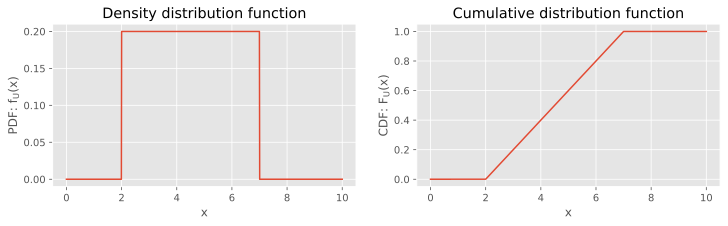

In [22]:
# Define a uniform probability distribution between 'a' and 'b'
a = 2
b = 5
U = stats.uniform(loc=a, scale=b)
# We define a range of values to evaluate the PDF, CDF
x = np.linspace(0,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(x, U.pdf(x))
ax1.set_xlabel('$x$')
ax1.set_ylabel('PDF: $f_U(x)$')
ax1.set_title('Density distribution function')

ax2.plot(x, U.cdf(x))
ax2.set_xlabel('$x$')
ax2.set_ylabel('CDF: $F_U(x)$')
ax2.set_title('Cumulative distribution function')
# p = np.linspace(0,1,1000)
# plt.plot(p, U.ppf(p))
plt.show()

**EXERCISE**: Do the same plots for a normal distribution with mean 5 and standard deviation 1.2.

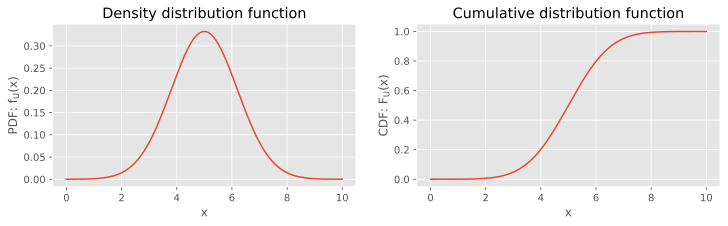

In [ ]:
# X variable should contain the normal distribution from stats package.

mu = 5
sigma = 1.2
X = stats.norm(loc=mu, scale=sigma)


x = np.linspace(0,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(x, X.pdf(x))
ax1.set_xlabel('$x$')
ax1.set_ylabel('PDF: $f_U(x)$')
ax1.set_title('Density distribution function')

ax2.plot(x, X.cdf(x))
ax2.set_xlabel('$x$')
ax2.set_ylabel('CDF: $F_U(x)$')
ax2.set_title('Cumulative distribution function')
plt.show()


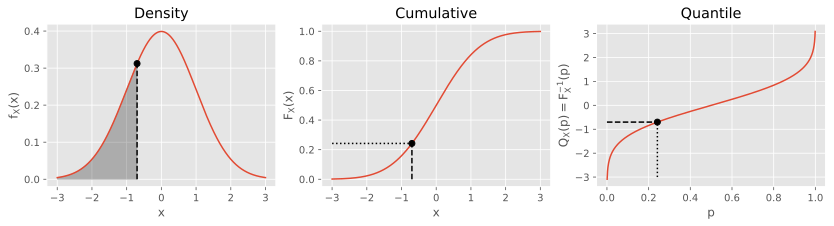

In [91]:
z0 = -0.7

# To have fun with sliders, uncomment the line below
# z0 = -0.9 #@param {type:"slider", min:-3, max:3, step:0.1}

# or you can use the "Insert > Add a form field" menu of Google Colab.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,3))
x = np.arange(-3,3,0.001)
mu = 0
sigma =1

z = x[x<z0]
f0 = stats.norm.pdf(z0, mu, sigma)
ax1.plot(x, stats.norm.pdf(x, mu, sigma))
ax1.fill_between(z, 0, stats.norm.pdf(z, mu, sigma), alpha=0.25, color='k')
ax1.plot(z0, f0, 'ko')
ax1.plot([z0, z0],[0, stats.norm.pdf(z0, mu, sigma)], 'k--')
ax1.set_xlabel('x')
ax1.set_ylabel('$f_X(x)$')
ax1.set_title('Density')

F0 = stats.norm.cdf(z0, mu, sigma)
ax2.plot(x, stats.norm.cdf(x, mu, sigma))
ax2.plot(z0, F0, 'ko')
ax2.plot([z0, z0],[0, F0], 'k--')
ax2.plot([-3, z0],[F0, F0], 'k:')
ax2.set_xlabel('x')
ax2.set_ylabel('$F_X(x)$')
ax2.set_title('Cumulative')

p = np.linspace(0,1,1000)
ax3.plot(p, stats.norm.ppf(p, mu, sigma))
ax3.plot(F0, z0, 'ko')
ax3.plot([0, F0], [z0, z0], 'k--')
ax3.plot([F0, F0], [-3, z0], 'k:')
ax3.set_xlabel('p')
ax3.set_ylabel('$Q_X(p)=F_X^{-1}(p)$')
ax3.set_title('Quantile')
    
plt.show()


**EXERCISE**: Using the binomial distribution, plot a histogram of a sample of the number of successes in 100 experiments of 10 trials with 80% of sucess each.

Notice: for a better reading of the plot, be careful with the bin centering, bin edges, 
bin width...

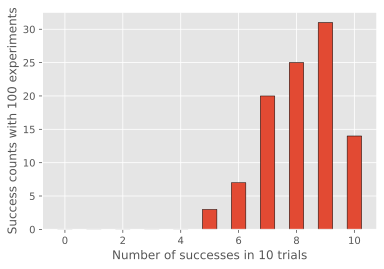

In [ ]:

n_trial = 10
success_proba = 0.8
B = stats.binom(n_trial, success_proba)
n_experiments = 100

Brvs = B.rvs(n_experiments)

plt.hist(Brvs,bins=range(0,12), edgecolor='k', align='left', rwidth=.5)
plt.xlabel('Number of successes in 10 trials')
plt.ylabel('Success counts with %d experiments' % n_experiments)
plt.show()



**EXERCISE**: Give the mean, variance, skewness and kurtosis of a binomial with n=20 trials and success probability p=0.4. You just need 1 line of code for all this. How?


In [ ]:


stats.binom.stats(20,.4, moments='mvsk')



# Computing summary statistics one by one
print('Bino mean = %.2f, var= %.2f, std = %.2f' % (B.mean(), B.var(), B.std()))
# Computing several summary statistics at once
Bmean, Bvar, Bskew, Bkurt = B.stats('mvsk')
print('Bino mean = %.2f, var= %.2f, skew =%.2f, kurt = %.2f' % \
      (Bmean, Bvar, Bskew, Bkurt))



(array(8.), array(4.8), array(0.09128709), array(-0.09166667))

## Custom distribution - howtos

You would like to define your own PDF?


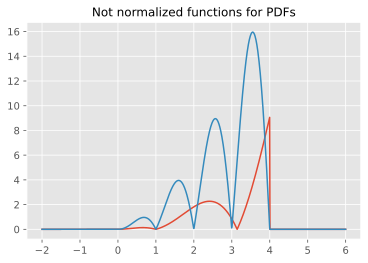

In [94]:
# A completely arbitrary (but positive) function
def my_custom_pdf(x, p):
  # defined on [0; 4] interval with f: x -> x*(p0-x)*sin(p1*x)
  # It has 2 parameters p0 and p1 given in array p.
  return np.array([ np.piecewise(x, \
                        [x < 0, x >= 4, x>=0 and x<4                     ],\
                        [0    , 0     , np.abs(x*(p[0]-x)*np.sin(p[1]*x))])\
           for x in x])

# Let's check its behaviour on some values
x = np.linspace(-2,6,1000)
plt.plot(x, my_custom_pdf(x, np.array((1,1))))
plt.plot(x, my_custom_pdf(x, np.array((-1,np.pi))))
plt.title('Not normalized functions for PDFs', fontsize=12)
plt.show()

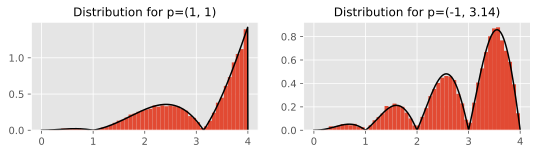

In [113]:
# Let's generate random samples from them. How?
from scipy.interpolate import interp1d 
x = np.linspace(0, 4, 1000)

# Quick and dirty quantile definition
par1 = (1, 1)
fx = my_custom_pdf(x, par1) # not normalized...
Fx = np.cumsum(fx)/np.sum(fx) # Computing the CDF
Qx = interp1d(Fx, x, kind='linear')
p = stats.uniform.rvs(size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,2))
ax1.hist(Qx(p), bins=50, density=True)
ax1.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax1.set_title(f'Distribution for p=(%.0f, %.0f)' % par1, fontsize=12)

par2 = (-1,np.pi)
fx = my_custom_pdf(x, par2)
Fx = np.cumsum(fx)/np.sum(fx)
Qx = interp1d(Fx, x, kind='linear')

ax2.hist(Qx(p), bins=50, density=True)
ax2.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax2.set_title(f'Distribution for p=(%.0f, %.2f)' % par2, fontsize=12)
plt.show()

You can even imagine to get a extremely regular sample. Instead of drawing random values for $p$ from the uniform distribution in $[0;1]$ you can use a equally spaced array for $p$

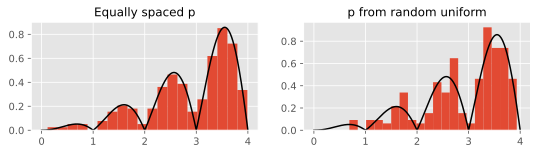

In [126]:
nsample = 200

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,2))
p = np.linspace(0+1e-4, 1-1e-4, nsample)
ax1.hist(Qx(p), bins=20, density=True)
ax1.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax1.set_title('Equally spaced p', fontsize=12)

np.random.seed(seed=123456)
p = stats.uniform.rvs(size=nsample)
ax2.hist(Qx(p), bins=20, density=True)
ax2.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax2.set_title('p from random uniform', fontsize=12)
plt.show()

This kind of trick can be used to check calculations with random variables with lower size samples without fluctuations for "debugging purposes"...

# Histograms

One of the simplest graphical view of PDF (continuous random variable), PMF (discrete). Data collection into classes, called **bins**.  
Either discrete data: simple choice of classes given by default by the discrete characteristics of the random variable. Or for continuous random variable: decide for the range of values. It's an arbitrary decision. Based on some criteria. Arbitrary number of bins. Arbitrary bin sizes. All bins with the same width? Not? Where to start and end? 

Answer: Up to you... + some clever modelling sometime,...  
or simply experimental expectation to drive the choice.  

Usually the case for physicists: be pragmatic. Do not enter in complex mathematical theory of expectation, information theory and so on. Just find a binning choice sufficient to sum up data in less categories than initially available. This usually simplify the analysis in 2 ways:
1. lower the dimensionality of the variations to the number of bins and not the number of data points and gives often faster computations;
2. "blur" the raw data in some interval... Make us unsensitive to peculiar values inside the range. This sets the limit to our precision we can reach in the model and its parameters.

Why not use raw data? Why kind of blur raw data into bins?  

Answer: To put a safety belt on what could happen when you open pandora box of your data sample... Remember that all the frequentist statistics business has to be set up prior to seeing data (see J. Donini and G. Cowan lectures). This is for all the coverage of confidence intervals and so on. 

**Every model is wrong**: 
If you collect data long enough, chances are your model will no longer be able to describe the data. Discordent effects may occur because of the accuracy of the data collected. These lack of model accuracy effects are not always imagined in advance. And changing the model after you have collected the data is among the most malicious thing a frequentist statistician can do.

In this way setting bounds by default on the bin widths and locations, kind of ban from looking too close to fine effects on recorded data. But the bins have to be set prior to data collection! So when dealing with large data sets, binning data is good in 2 ways: computation efficiency and avoid revealing your model is indeed wrong, even if it is sufficient and robust to estimate your theory parameters... !!!


<img src="https://drive.google.com/uc?id=1_Op--iIAbMPPexLSiYdC2kB_f97QEqV9" width=800px>


#### Plotting histograms as dots with error bars

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2020/master/Error_bars.png" width="800px">
<figcaption><b>Fig. 2</b> | Drawing count data with a dot and an error bar. Data count follows as Poisson distribution. Here $k$ counts are observed. The estimated variance is thus $k$ and so the standard deviation is $\sqrt{k}$. The dot is thus displayed at $y=k$ for this bin content and the error bars extend up to $y_{\rm up} = k+\sqrt{k}$ and down to $y = k-\sqrt{k}$ by convention.</figcaption>

## Counting (or frequency) histogram and density histogram

Choice of the histogram normalization: pay care to this point. Counting (or frequency) and density.

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2020/master/Histograms.png" width="800px">
<figcaption><b>Fig. 2</b> | Two main ways to display histograms. The first one is the basic counting of the number of occurences of $x_1,\ldots,x_n$ which fall inside the bin range. We call it $N$. The other way is related to the probability density function. The counting $N$ is thus normalised with respect to the bin width $\Delta{x}$ and the total number of events, $n$, in the data sample $(x_1,\ldots,x_n)$</figcaption>.

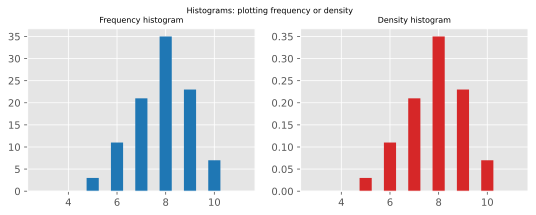

In [ ]:
# Plot histograms with both normalization
# 1. Frequency distribution
# 2. Density distribution

n_trial = 10
success_proba = 0.8
B = stats.binom(n_trial, success_proba)
n_experiments = 100

Brvs = B.rvs(n_experiments)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))
# Plotting histograms and playing with arguments
# using numpy.arange
ax1.hist(Brvs, range=(3,12), bins=9, density=False, color='tab:blue',\
         align='left', rwidth=.5) # density = True|default=False, 
ax1.set_title('Frequency histogram', fontsize=8)

# Changing normalization to density
ax2.hist(Brvs, range=(3,12), bins=9, density=True, color='tab:red',\
         align='left', rwidth=.5) # density = True|default=False, 
ax2.set_title('Density histogram', fontsize=8)

fig.suptitle('Histograms: plotting frequency or density', fontsize=8)
plt.show()

We end up here just with a global normalization effect. Not a big deal. Just take care in handling the normalization and it's done.

## Bin width - irregular binning

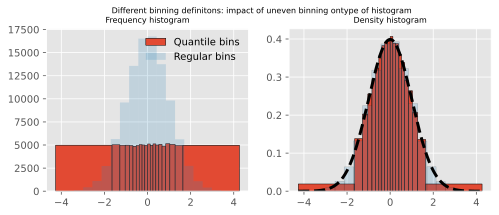

In [127]:
X = stats.norm

r = X.rvs(size = 100000)
nbins = 20
p = np.linspace(0+1e-5,1-1e-5,nbins+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.hist(r, bins=X.ppf(p), edgecolor='k', density=False, alpha=1, \
         label='Quantile bins')
xmin, xmax = X.ppf([min(p), max(p)])
bins_eq = np.linspace(xmin, xmax, nbins+1)
ax1.hist(r, bins=bins_eq, edgecolor='none', density=False, alpha=.2, \
         label='Regular bins')
ax1.set_title('Frequency histogram', fontsize=8)
ax1.legend(frameon=False)

ax2.hist(r, bins=X.ppf(p), edgecolor='k', density=True, alpha=1)
xmin, xmax = X.ppf([min(p), max(p)])
bins_eq = np.linspace(xmin, xmax, nbins+1)
ax2.hist(r, bins=bins_eq, edgecolor='k', density=True, alpha=.2)
x = np.linspace(xmin,xmax,1000)
ax2.plot(x, X.pdf(x), lw=3, ls='--', color='k')
ax2.set_title('Density histogram', fontsize=8)

fig.suptitle('Different binning definitons: impact of uneven binning on'+ \
              'type of histogram', fontsize=8)
plt.show()

Using the quantile (inverse cumulative distribution) to define the bin widths, our collected data sample should look flat with a frequency binning. This means that every bin is expected to have the same statistical fluctuations. It could reveal convenient for graphical check up and for fitting (homeskedastic, i.e. same variance). And we can recover the probability density shape by drawing the density histogram. Both definitions are very convenient.

**EXERCISE**:  

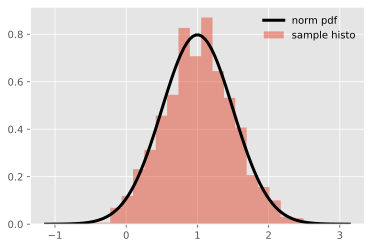

In [ ]:
fig, ax = plt.subplots(1, 1)
# Define a normal random variable with
mu = 1
sigma = .5
X = stats.norm(loc=mu, scale=sigma)
# mean, var, skew, kurt = X.stats(moments='mvsk')
x = np.linspace(X.ppf(1e-5),X.ppf(1-1e-5), 100)
ax.plot(x, X.pdf(x),'k-', lw=3, alpha=1, label='norm pdf')
r = X.rvs(size=1000)
ax.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.5, \
        label='sample histo')
ax.legend(loc='best', frameon=False)
plt.show()


> **Q1**: From the PDF, what is the probability that X>0?  
> **Q2**: From the PDF, what is the 0.92 quantile of X?  
> **Q3**: From the PDF and the sample of size 1000, Draw the sample quantile as a function of the theoretical quantile. [QQplot]  


0.9772498680518208
1.7025357801548164


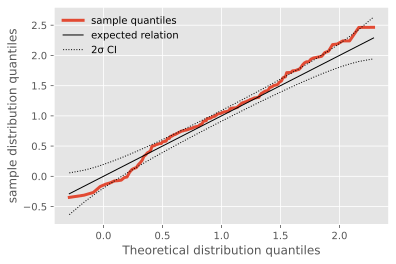

In [ ]:
# Q1_ans
print(1-X.cdf(0))
# Q2_ans
print(X.ppf(0.92))
# Q3_ans
r = X.rvs(size = 200)
n = len(r)
rs = np.sort(r)
Qth = np.zeros(len(r))
Qobs = np.zeros(len(r))
for i, x in enumerate(r):
  Qth[i] = X.ppf((i+1)/(n+1))
  Qobs[i] = rs[i]

def QQvar(X,p,n):
  # Asymptotic variance of the quantiles: normal distribution with variance
  return p*(1-p)/(n*(X.pdf(X.ppf(p)))**2)

# print('QQvar = ', QQvar(X,[.2 .3],10))
std = np.asarray([ np.sqrt(QQvar(X,(i+1)/(n+1),len(r))) for i, _ in enumerate(r)])

plt.plot(Qth,Qobs, linewidth=3, label="sample quantiles")
plt.plot(Qth,Qth, 'k', linestyle='-', linewidth=1, label="expected relation")
plt.plot(Qth,Qth+2*std, 'k', linestyle=':', linewidth=1, label="2σ CI")
plt.plot(Qth,Qth-2*std, 'k', linestyle=':', linewidth=1)
plt.xlabel('Theoretical distribution quantiles')
plt.ylabel('sample distribution quantiles')
plt.legend( frameon=False)
plt.show()


A QQplot is a convenient way to check a sample is following a given theoretical prediction. 


## Averages and CLT, the Central Limit Theorem

**Central Limit Theorem in short**: For any distribution with finite variance, adding up a large amount or independent random variables $X_i$ with the same distribution (with finite variance) lead to a normal distribution of the sum of the variables $\sum_{i=1}^N X_i$. This is the central limit theorem (CLT).

We demonstrate below two cases: the coin flip of the dice roll. You can experiment choosing in the menu below and run the next cell.

In [ ]:
experiment = "coin" #@param ["coin", "dice"]

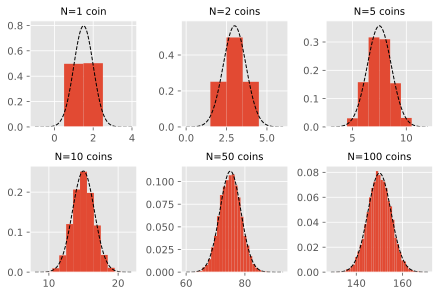

In [ ]:
numIterations = np.asarray([1, 2, 5, 10, 50, 100]); #number of i.i.d RVs

maxNumForExperiment = {'dice': 6, 'coin': 2} #max numbers represented on dice or coins
nSamp=10000

k = maxNumForExperiment[experiment]

fig, fig_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)

for i,N in enumerate(numIterations):
    y = np.random.randint(low=1, high=k+1, size=(N,nSamp)).sum(axis=0)
    row = i//3
    col=i%3
    bins=np.arange(start=min(y), stop=max(y)+2, step=1)
    fig_axes[row, col].hist(y, bins=bins, density=True, align='left')
    plural = lambda n: 's' if n>1 else ''
    fig_axes[row, col].set_title('N={} {}'.format(N,experiment+plural(N)), fontsize=10)
    x = np.linspace(min(y)-2, max(y)+2, 100)
    fig_axes[row, col].plot(x, stats.norm.pdf(x, loc=np.mean(y),\
                                              scale=np.std(y)),\
                            color='k', linewidth=1, linestyle='--')

plt.show()


An important consequence is the convergence of the average:
* as $1/\sqrt{n}$ (random dispersions of the mean decrease with $n$ as $1/\sqrt{n}$) if each component of the sum has a finite variance;
* and to a normal distribution (CLT, see above).

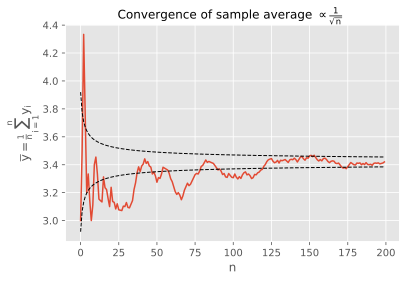

In [ ]:
y = np.random.randint(low=1, high=7, size=(200,1)).cumsum(axis=0)
ymean = y[-1]/len(y)

plt.plot([S/(i+1) for i, S in enumerate(y)])
plt.plot(ymean + .5/np.sqrt(np.arange(1,len(y)+1)),\
         color='k', linestyle='--', linewidth=1)
plt.plot(ymean - .5/np.sqrt(np.arange(1,len(y)+1)),\
         color='k', linestyle='--', linewidth=1)
plt.title(r'Convergence of sample average $\propto\frac{1}{\sqrt{n}}$ ', fontsize=12)
plt.xlabel('n')
plt.ylabel(r'$\overline{y} = \frac{1}{n} \sum_{i=1}^n y_i$')
plt.show()
# for i, S in enumerate(y):
#   print('i= %d, S= %.2f' % (i,S/(i+1)))

# Covariance - correlations


In [ ]:
# Computing correlation matrix C from covariance matrix V
C = np.asarray([\
                 V[i,j]/np.sqrt(V[i,i]*V[j,j]) \
                 for i in range(V.shape[0]) \
                 for j in range(V.shape[1]) \
                 ]).reshape(V.shape)

# Antoher way to compute the correlation matrix
# C2 = V/np.sqrt(np.outer(np.diag(V), np.diag(V)))
# np.allclose(C2-C,0) # check all coeffs, if True, both ways are equivalent.

True


## Population and sample covariance




In [ ]:
# Population covariance
V = np.matrix([[2, 1, 1], [1, 2, 1], [1, 1, 1]])
# multivariate normal distribution
X = stats.multivariate_normal(cov=V)
# Sample of size N
N = 10
Xrvs = X.rvs(size=N)

# Compute the sample covariance matrix
np.cov(Xrvs) # wrong, be careful on dim of X.rvs...
np.cov(Xrvs.T)
# Then increase size of X.rvs.

# Decorrelate the random variables and normalize their variance to 1
D, P = np.linalg.eig(V)
# P@np.diag(D)@P.T
Y = np.diag(1/np.sqrt(D))@P.T@Xrvs.T
# Also possible to use the Cholesky decomposition...

# Check the decorrelation/normalization transformation is working
np.round(np.cov(Y),2)

array([[ 0.99, -0.01, -0.02],
       [-0.01,  1.  ,  0.02],
       [-0.02,  0.02,  0.98]])

Let $\varepsilon_i$ be independent random variables with mean $0$ and variance $1$.  
We define 3 new random variables $X_i$:   
> (a) $X_1 = \varepsilon_1 + \varepsilon_3$  
> (b) $X_2 = \varepsilon_2 + \varepsilon_3$  
> (c) $X_3 = \varepsilon_3$  

**Q1**: What is the covariance between any $X_i$ and any $X_j$? Write this as a 3x3 matrix.

**Q2**: What is the associated correlation matrix? Why is $X_1$ correlated with $X_2$?

**Q3**: If $X_3$ is fixed at some given observed value, $X_3=x_3$, what is the correlation between $X_1$ and $X_2$? 

**Q4**: We call this the partial correlation of $X_1$ and $X_2$ given $X_3$. We note it ${\rm Cor}[X_1,X_2|X_3]$. What is ${\rm Cor}[X_1,X_3|X_2]$?


In [237]:
from scipy.linalg import inv
# Covariance matrix
V = np.matrix([[2, 1, 1], [1, 2, 1], [1, 1, 1]])

# Computing correlation matrix C from covariance matrix V
C = np.asarray([\
                 V[i,j]/np.sqrt(V[i,i]*V[j,j]) \
                 for i in range(V.shape[0]) \
                 for j in range(V.shape[1]) \
                 ]).reshape(V.shape)
# Antoher way to compute the correlation matrix
# C2 = V/np.sqrt(np.outer(np.diag(V), np.diag(V)))
# np.allclose(C2-C,0) # check all coeffs, if True, both ways are equivalent.
print('C =', C)



C = [[1.         0.5        0.70710678]
 [0.5        1.         0.70710678]
 [0.70710678 0.70710678 1.        ]]


In [238]:
# Inverse the correlation matrix
Cinv = np.round(inv(C))
print('Cinv = ', Cinv)

# Define Variance Inflation Factors
VIF = np.diag(Cinv)
print('VIF = ', VIF)

c = np.sqrt(VIF)
outer_c = np.outer(c, c)
# Define partial correlation matrix
Cp = 2*np.eye(3)-Cinv/outer_c
Cp[Cp == 0] = 0
print('Cp = ', Cp)

Cinv =  [[ 2. -0. -1.]
 [-0.  2. -1.]
 [-1. -1.  3.]]
VIF =  [2. 2. 3.]
Cp =  [[1.         0.         0.40824829]
 [0.         1.         0.40824829]
 [0.40824829 0.40824829 1.        ]]


# Linear regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ($x$), and the other is considered to be a dependent variable ($y$).  Be careful, linear means linear in the parameter(s) not necessarily in $x$.

For example, when we would like to calibrate an instrument, we give some input light or energy or charge deposition to a detector, a sensor and we record some output from the device: a voltage, a current, a count (from a digital counter). The calibration step is to get the trend from the input variables we know, $x$, to the output variables we get experimentally, $y$.

Let's do it with some example below.



## Ordinary least squares (OLS)

<img src="https://drive.google.com/uc?id=1oQiVDiDBSUAgJLmFzqyRkdJZkESC70ke" width=800px>

The model is thus defined as:
$$f(x) = a + b\times x$$

$a$ is called the intercept (value of $y$ at $x=0$). $b$ is called the slope (increment in $y$ by 1 unit of $x$). We assume there is some error in the measurement process, $e$. We assume the instrument response is truly linear and we call $a^\star$ and $b^\star$ the true values of $a$ and $b$ above. We collect data samples $(y_1,\ldots,y_n)$ for different given values $x_1,\ldots,x_n$ with:
$$y_i = a^\star + b^\star x_i + e_i$$

We do not know $a^\star$, $b^\star$ and $e_i$ and we would like to determine their values from $x_i$ and $y_i$. The problem is that we do not know $e_i$ neither and their values change from one measurement to the other.

With 2 points we can determine $a$ and $b$. We neglect variations in the $y_i$ caused by the $e_i$. $b = (y_2-y_1)/(x_2-x_1)$, and $a=(y_1+y_2)/2+b\times(x_1+x_2)/2$. $b$ is sentistive to the spread in $x$ and $y$ while $a$ is sensitive to the average in $x$ and $y$.

With many points we can reduce the uncertainty on the determination of $a$ and $b$. Still no real hypothesis on $e_i$. This is the scope of the OLS regression. How to fit?

Least squares minimize the distance w.r.t $y$'s values.

$$\sum_{i=1}^n \left(y_i - (a+b\times x_i)\right)^2$$


# Fitting

Fitting is adjusting the parameters of the model to best describe your data. This operations come down to minimize some "distance" between your model and the data.

There are plenty of tools (Python packages) to fit data. None of them is universal. They cover different aspects.
* [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html): Use non-linear least squares to fit a function, f, to data. 
* [least squares](http://wwwens.aero.jussieu.fr/lefrere/master/SPE/docs-python/scipy-doc/generated/scipy.optimize.curve_fit.html): Solve a nonlinear least-squares problem with bounds on the variables. 
* [statsmodels](https://www.statsmodels.org/): estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
* [iMinuit](https://iminuit.readthedocs.io/en/stable/): general robust function minimisation method, but is most commonly used for likelihood fits of models to data, and to get model parameter error estimates from likelihood profile analysis. 
* [probfit](https://probfit.readthedocs.io/en/latest/): set of functions that helps you construct a complex fit. It’s intended to be used with iminuit. Binned/Unbinned Likelihood estimator, $\chi^2$ regression, Simultaneous fit estimator... 
* [myFitter](https://myfitter.hepforge.org): A Python framework for global fits. It features computation of maximum likelihood estimates of model parameters, handles non-linear constraints on the parameter space, computes profile likelihoods,
and helps visualisation of one and two-dimensional confidence regions. 
* [emcee](https://emcee.readthedocs.io/en/stable/) for Markov Chain Monte Carlo with a Bayesian fitting framework.

All these tools tend to be rather generic and can be sufficient most of the time. However you could always encounter a problem wich is not tackled by one of this package.

For the purpose of this session, we stay however with the basic tools such as `scipy.optimize.minimize` and `scipy.optimize.curve_fit`.



You have to know how to define a function to be minimized, providing initial values of the parameters, provide bounds on the parameters. There are different methods used in the minimization engine. You could play later on with them. They have different performances (memory, convergence speed, robustness etc.). For what we have to do, don't bother with them.

The typical call to minimize is such that:

`solution = minimize(my_function, my_init_parameter_guesses, bounds=par_bounds)`

`solution` is then a dictionary with the output of the minimization. 

The parameters at which the minimum occur are stored in `solution.x`. And you can access the to the hessian matrix. The hessian matrix is useful to estimate the covariance among the fitted parameters at the best fit point.

To use `curve_fit`, the typical call is:

`pars, cov_pars = curve_fit(f, x, y)`

`f` is the model function with the parameters to be minimized, `x` and `y` the data points. It provides directly with the best fit parameters in `pars` and the covariance matrix of the fitted parameters in `cov_pars`.



## Fitting with least squares


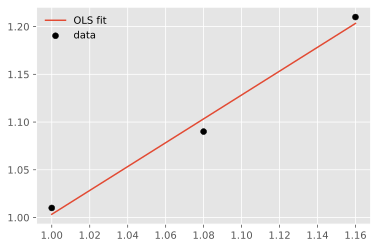

In [ ]:
from scipy.optimize import curve_fit
y = np.array([1.01, 1.09, 1.21])
x = np.array([1, 1.08, 1.16])

def f(x, a, b):
    return a + b*x

pars, cov_pars = curve_fit(f, x, y)

plt.plot(x, f(x, *pars), label="OLS fit")

plt.scatter(x, y, facecolor='k', label="data")

plt.legend(frameon=False)
plt.show()

In [ ]:
residuals = f(x, *pars) - y
residuals

array([-0.00666667,  0.01333333, -0.00666667])

What are the uncertainties on determined $a$ and $b$?



In [ ]:
pars_uncertainties = np.sqrt(np.diag(cov_pars))
pars_uncertainties

array([0.31180478, 0.14433757])

## Fitting with weigths

<img src="https://drive.google.com/uc?id=1GgIUmDVvGIWUFxwlStZqwIpqpzzU1J-w" width=800px>



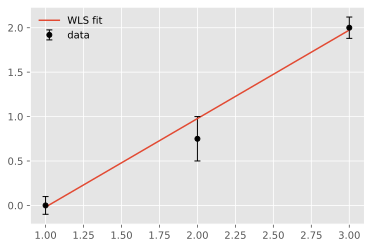

In [ ]:
x = np.array([1, 2, 3])
y = np.array([0, 0.75, 2])
sigma = np.asarray([.1, .25, .12])
# Be careful on this call
# Here sigma is 1-D, so curve_fit expect standard deviation sigma
pars, pcov = curve_fit(f, x, y, sigma=sigma)
# Or if sigma is 2-D,  curve_fit expect a covariance matrix
# pars, pcov = curve_fit(f, x, y, sigma=np.diag(sigma**2))

plt.plot(x, f(x, *pars), label="WLS fit")

plt.errorbar(x, y, yerr=sigma, \
             fmt="ok", lw=1, capsize=3, markersize=5, label='data')

plt.legend(frameon=False)
plt.show()

## Fitting with correlations

<img src="https://drive.google.com/uc?id=1BDn-TxymvVMDNL25I7PNvkLCuDcO14wT" width=800px>



Let's start with some fit with a covariance matrix taking into account the correlation between the $y_i$ values.



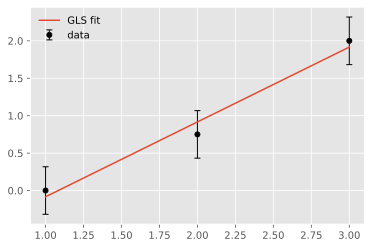

In [ ]:
x = np.array([1, 2, 3])
y = np.array([0, 0.75, 2])
ycov = np.array([[0.101, 0.1  , 0.1  ],
                 [0.1  , 0.101, 0.1  ],
                 [0.1  , 0.1  , 0.101]])

pars, pcov = curve_fit(f, x, y, sigma=ycov)

plt.plot(x, f(x, *pars), label="GLS fit")

plt.errorbar(x, y, yerr=np.sqrt(np.diag(ycov)), \
             fmt="ok", lw=1, capsize=3, markersize=5, label='data')

plt.legend(frameon=False)
plt.show()

So the fit looks ok. The error bars look big and the line close to the points. This type of fit often reflect a large impact due to correlations among the data points.

Let's continue with another case of covariance structure.

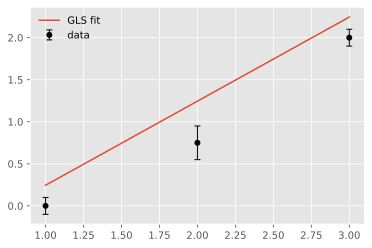

In [ ]:
x = np.array([1, 2, 3])
y = np.array([0, 0.75, 2])
ycov = np.array([[0.0101, 0.02  , 0.01  ],
                 [0.02  , 0.0401, 0.02  ],
                 [0.01  , 0.02  , 0.0101]])
# v = np.matrix([1, 2, 1])
# ycov = .0001*np.eye(3) + .01*v.T@v
# ycov
pars, pcov = curve_fit(f, x, y, sigma=ycov)

plt.plot(x, f(x, *pars), label="GLS fit")

plt.errorbar(x, y, yerr=np.sqrt(np.diag(ycov)), \
             fmt="ok", lw=1, capsize=3, markersize=5, label='data')

plt.legend(frameon=False)
plt.show()

Here, the things look pretty strange. All the data points are on the bottom of the best fit model. This could be a bug. But when you check, this behaviour seems correct. What did happen? Could this be due to covariance matrix of the data points?

## Fitting with pulls

<img src="https://drive.google.com/uc?id=1o_FL6b3HcW3jORPRhw7gPOLt-Jy5L46h" width=800px>

So, both approaches are equivalent to determine $a$ and $b$. However when we use the covariance $\chi^2$ approach, we lose the track of $\hat{c}$ in the model.

Let's define the 2 equivalent $\chi^2$ functions.

In [ ]:
yerr = 0.01*np.array([1, 1, 1])

def chi2_pull(pars, x, y, yerr):
  a, b, c = pars
  z = np.array([1, 2, 1])
  sigma_c = 0.1
  # weighted chi square definition
  chi2 = np.sum((y-f(x, a, b)+z*c)**2/yerr**2)
  pull = np.sum(c**2)/sigma_c**2
  return chi2 + pull

def chi2_cov(pars, x, y, yerr):
  a, b = pars
  z = np.matrix([1, 2, 1]).T
  sigma_c = 0.1
  ycov = np.diag(yerr**2) + sigma_c**2*(z@z.T)
  Vinv = np.linalg.inv(ycov)
  # Generalized chi square definition
  chi2 = np.sum((y-f(x, a, b)).T@Vinv@(y-f(x, a, b)))
  return chi2


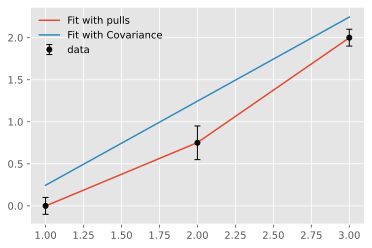

In [ ]:
# We minimize the chi square with the pull approach: 3 parameters a, b, c
soln_pull = minimize(lambda *args: chi2_pull(*args), [1, 1, 1], args=(x, y, yerr))
a_pull, b_pull, c_pull = soln_pull.x

# We minimize the chi square with the covariance approach: 2 parameters a, b
soln_cov  = minimize(lambda *args: chi2_cov(*args), [1, 1], args=(x, y, yerr))
a_cov, b_cov = soln_cov.x

plt.errorbar(x, y, yerr=np.sqrt(np.diag(ycov)), \
             fmt="ok", lw=1, capsize=3, markersize=5, label='data')
z = np.array([1, 2, 1])
plt.plot(x,f(x, ap, bp)-cp*z, label='Fit with pulls')
plt.plot(x,f(x, ac, bc), label='Fit with Covariance')
plt.legend(frameon=False)
plt.show()


You see the fit looks much better with the pull approach than with the covariance approach. Let's check the values of $\hat{a}$ and $\hat{b}$.

In [ ]:
print('a_pull = ', a_pull)
print('a_cov  = ', a_cov)
print('\n')
print('b_pull = ', b_pull)
print('b_cov  = ', b_cov)
print('\n')
print('c_pull = ', c_pull)

a_pull =  -0.7549262029496759
a_cov  =  -0.7549260932725901


b_pull =  0.9999999701552775
b_cov  =  0.9999999896395889


c_pull =  0.24630530860154976


They are almost the same. The difference is only due to numerical accuracy. So the full model 
$$f(x,a,b,c) = a + b x_i + c z_i$$
is able to track the correlation between the data points and indeed in this setup the data covariance matrix is diagonal ${\rm diag}(\sigma_1^2,\ldots,\sigma_n^2)$. So the best fit behaves as in the WLS case. This particular behaviour of the GLS happen when you have typically large correlations among the data points you provide to the fit.

Let's sum up the situation even further.

<img src="https://drive.google.com/uc?id=1g0dFP1fUSvce7ypnZTwO_37-6tkeyjzY" width=800px>

In this example, $a$ and $b$ are our parameters of interest, and $c$ plays the role of a nuisance parameter. Even if we do not care a priori about the nuisance parameters it is still usefull for the global fit to the data to explain the observed pattern.

Covariance and pull approaches are equivalent (in the linear case, and for normal distributions) for what concern a and b however there is more information in the display of the best fit model to $y$ in the pull approach with $c$ taken at the best fit value. The plot then looks more natural...

Covariances and correlations can be tricky. Pay attention. Systematic approach with pull terms is more interpretable. 

# Plotting the residuals


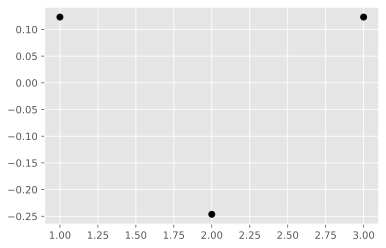

In [ ]:
plt.plot(x,(y-f(x, ap, bp)+S*cp)/yerr, 'ko', ls='none')
plt.show()

In [ ]:
1/np.sqrt(2)

0.7071067811865475



## Fitting with errors in $x$ too



<img src="https://drive.google.com/uc?id=1QV0dlaynZqlaotIE7b8WN2XVuqvLIKoi" width=800px>



In [ ]:
# For fitting with emcee
# first install emcee which is not available in Colab by default
# !pip install emcee
# Then copy paste the example tutorial on try to understand it.
# https://emcee.readthedocs.io/en/stable/tutorials/line/

In [189]:
# Define the double negative log likelihood (similar to chi square, of least squares)
def dbl_neg_log_likelihood(theta, x, y, yerr):
    a, b = theta
    model = a + b * x
    sigma2 = yerr**2 + a**2*x**2
    return np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def least_squares(theta, x, y, yerr):
    a, b = theta
    model = a + b * x
    sigma2 = yerr**2 + a**2*x**2
    return np.sum((y - model) ** 2 / sigma2)    

Maximum likelihood estimates:
a = 0.245
b = 2.060
Least squares estimates:
a = 8.050
b = -0.120


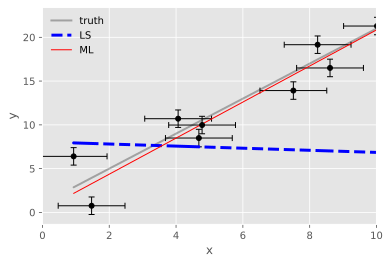

In [190]:
from scipy.optimize import minimize

x = np.linspace(1,10,9)
a_true = 1
b_true = 2

np.random.seed(1234)

xerr = 1
y = a_true + b_true*x
x += xerr*np.random.randn(*x.shape)
yerr = 1
y += yerr*np.random.randn(*y.shape)

nll = lambda *args: dbl_neg_log_likelihood(*args)
initial = np.array([a_true, b_true]) + 0.1 * np.random.randn(2)
soln_ml = minimize(nll, initial, args=(x, y, yerr))
a_ml, b_ml = soln_ml.x
print("Maximum likelihood estimates:")
print("a = {0:.3f}".format(a_ml))
print("b = {0:.3f}".format(b_ml))

lsq = lambda *args: least_squares(*args)
initial = np.array([a_true, b_true]) + 0.1 * np.random.randn(2)
soln_lsq = minimize(lsq, initial, args=(x, y, yerr))
a_lsq, b_lsq = soln_lsq.x
print("Least squares estimates:")
print("a = {0:.3f}".format(a_lsq))
print("b = {0:.3f}".format(b_lsq))


plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="ok", lw=1, capsize=3, markersize=5)
plt.plot(x, a_true+b_true*x , "k", alpha=0.3, lw=2, label="truth")
plt.plot(x, a_lsq+b_lsq*x, "--b", lw=3, label="LS")
plt.plot(x, a_ml+b_ml*x, "-r", lw=1, label="ML")
plt.legend(frameon=False)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

# Maximum likelihood estimation

Here the goal is to fit data with likelihood. And to pay attention to the likelihood normalization. We will be fitting an exponential distribution and an exponential distribution with cuts...



## Question 1

Generate a sample of size 100 from an exponential distribution $f_X(x,\lambda) = \lambda e^{-\lambda x}$ with $\lambda = 1/2$. Find for this, the appropriate function in `scipy.stats` package. Call `X` the variable which contains this data sample.

1. Check that the mean and the variance are indeed from what you expect from an exponential distribution. Did you pay attention to the arguments to call this function such as `loc` and `scale`?

2. Draw a histogram of this sample `X` (Use `matplotlib.pyplot.hist`).

3. Get used to `bins`, `range`, `width`, `density` options. Try them and check the behaviour. Especially look at the y-axis scale.

4. Plot superimposed the histogram and the exponential PDF from the function definition. How can you make the PDF and the histogram look more alike for what concerns the y-scale?

mean = 2.00
var = 3.97


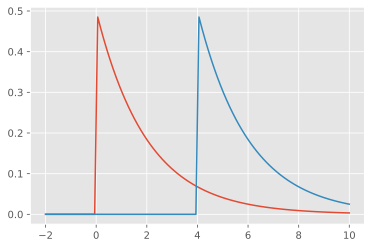

In [221]:
lb = .5
X = stats.expon(loc=0,scale=1/lb).rvs(size=10000)

print('mean = %.2f' % np.mean(X))
print('var = %.2f' % np.var(X))


x = np.linspace(-2,10,100)

plt.plot(x,stats.expon(loc=0,scale=1/lb).pdf(x));
plt.plot(x,stats.expon(loc=4,scale=1/lb).pdf(x));

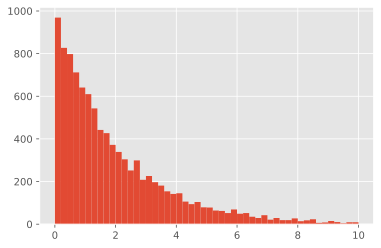

In [222]:
bin_edges = np.linspace(0,10,51)
plt.hist(X, bins=bin_edges);

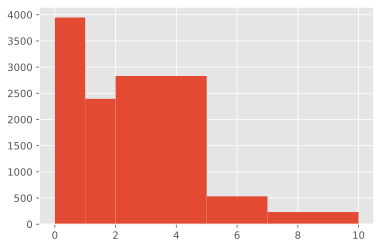

In [223]:
bin_edges = (0, 1, 2, 5, 7, 10)
plt.hist(X, bins=bin_edges);

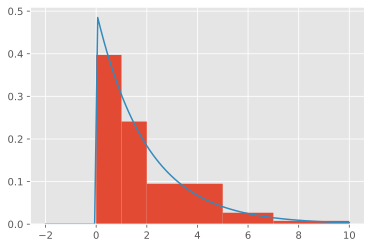

In [224]:
bin_edges = (0, 1, 2, 5, 7, 10)
plt.hist(X, bins=bin_edges, density=True);
plt.plot(x,stats.expon(loc=0,scale=1/lb).pdf(x));

## Question 2

We want now to fit the data set `X` we defined in the previous Question.
You will have to use `minimize` function from `scipy.optimize`. Read the documentation.

You have to define:
1. the PDF of the exponential PDF ($f_X(x;\lambda)$)
2. the loglikelihood ($-2\log f_X(x;\lambda)$) of the dataset with this PDF.

Then minimize the loglikelihood and plot the result (the histogram with the data and the best fit PDF i.e. the PDF with parameter value obtained from the minimization process of the loglikelihood).



In [225]:
def exp_pdf(x,lb):
  return lb*np.exp(-lb*x)

def llexp(lb):
  return -2*np.log(exp_pdf(X,lb)).sum()

In [226]:
from scipy.optimize import minimize

soln = minimize(llexp,1,bounds=[(0.000001,None)])

soln.x

array([0.50108])

## Question 3

Assume now that `X` is still from the exponential distribution with $\lambda=1/2$ defined above, but for some experimental reason you only have access to data bewteen 1 and 3.

1. Use the first question instructions to generate a sample of `X` values of size 1000. Then select only the cases between 1 and 3. For instance use 
`X=X[(X>1)&(X<3)]`. 
2. Fit this new dataset with the likelihood defined in previous question. Do you find the same estimate? Why?
3. You would have expected do get the same estimate of $\lambda$ since this is the same generating process. What biases the estimator?
4. Check the normalization of the likelihood on the sample space ($x$ values). The likelihood should always be normalized to 1 on the sample space. Define therefore a new likelihood correctly normalized for $x$ values between 1 and 3. Do you get now a reasonable estimator of $\lambda$?

In [227]:
Y = X[(X>1)&(X<3)]

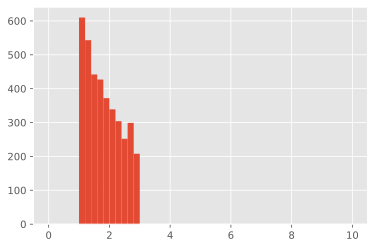

In [228]:
plt.hist(Y, bins=50, range=(0,10));

In [229]:
def llexp(lb):
  return -2*np.log(exp_pdf(Y,lb)).sum()

res2 = minimize(llexp,1,bounds=[(0.000001,None)])
res2

      fun: 12139.558051073924
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 6
   status: 0
  success: True
        x: array([0.54936433])

In [230]:
def exp_pdf(x,lb):
  return (x>1)*(x<3)*lb*np.exp(-lb*x)/(np.exp(-1*lb)-np.exp(-3*lb))

def llexp(lb):
  return -2*np.log(exp_pdf(Y,lb)).sum()

soln3 = minimize(llexp,1,bounds=[(0.000001,None)])
soln3


      fun: 4890.934295763007
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([0.54992008])

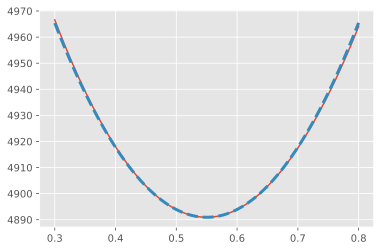

In [235]:
lb_val = np.linspace(.3,.8,100)
plt.plot(lb_val, [llexp(lb) for lb in lb_val])
chi2min = llexp(soln3.x)
sigma_lb = np.sqrt(2*soln3.hess_inv.matmat(np.eye(1)))
sigma_lb = np.sqrt(2*soln3.hess_inv.todense())
plt.plot(lb_val, chi2min + [(lb-soln3.x)**2 for lb in lb_val]/sigma_lb**2, \
         linestyle = '--', linewidth=3)

plt.show()


Always pay attention to normalize your likelihood to the range of the data sample if it is restricted.